# Introduction
In this project, we are going to analyze 4 trading strategies and how these strategies perform differently.  

Strategy 1 = Buy-and-hold the SPY exchange-traded fund (ETF). 

Strategy 2 = Hold SPY intraday only (i.e., buy at open and sell at close). 

Strategy 3 = Hold SPY overnight only (i.e., buy at close and sell at open). 

Strategy 4 = Buy-and-hold SPY except for worst "n"days and best  "n"days each year, where n = 1,2,3. 

In [1]:
# imoprted required packages of python
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Markdown
from tabulate import tabulate

/var/folders/q7/rl1ql8s51w7g6407mjltrv0r0000gn/T/ipykernel_31085/191359993.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# downloading data for SPY from Yahoo Finance from 2021-01-01 to 2024-02-23 and investment value of $10000
investment = 10000
data = yf.download(tickers='SPY',start='2021-01-01',end='2024-02-23')
data = pd.DataFrame(data)

/Users/nilkanthpatel/anaconda3/envs/fina6339/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [3]:
# strategy 1: Buy-and-hold the SPY exchange-traded fund (ETF)

# calculated simple return and cumulative return of SPY
data["S1_returns"] = data["Adj Close"].pct_change().dropna()
data['S1_return_cumulative'] = data["S1_returns"].cumsum()

In [4]:
# S2. Hold SPY intraday only (i.e., buy at open and sell at close)

# calculated simple return and cumulative return of SPY
data["S2_returns"] = (data["Close"] - data['Open'])/data['Open']
data['S2_return_cumulative'] = data["S2_returns"].cumsum()

In [5]:
# Strategy 3: Hold SPY overnight only (i.e., buy at close and sell at open)

# calculated simple return and cumulative return of SPY
data["S3_returns"] = ((data['Open'] - data['Close'].shift(1)) / data['Close'].shift(1))
data['S3_return_cumulative'] = data["S3_returns"].cumsum()

In [6]:
# Strategy 4: Buy-and-hold SPY except for worst $n$ days and best $n$ days each year, where $n \in {1,2,3}$

# calculated simple return and cumulative return of SPY
def buy_and_hold_with_exclusion(data, n):

    returns = data["S1_returns"]
    best_n_days = returns.groupby(returns.index.year).nlargest(n).index.get_level_values(1)
    worst_n_days = returns.groupby(returns.index.year).nsmallest(n).index.get_level_values(1)
    exclusion_days = best_n_days.union(worst_n_days)
    
    data[f'{"s4_days"}{n}'] = returns[~returns.index.isin(exclusion_days)]
    data[f'{"s4_cumulative_days"}{n}'] = data[f'{"s4_days"}{n}'].cumsum()
    return

for n in [1,2,3]:
    buy_and_hold_with_exclusion(data= data, n=n)

In [7]:
# Descreptive stastics of returns

def descriptive_statistics(data):
    return[data.mean(), data.var(), data.std(),data.kurtosis(),data.skew(),(data.mean()*252-0.043)/(data.std()*np.sqrt(252))]

metrics = ['mean','Variance','Standard deviation','kurtosis','skewness','sharpe ratio']
column = ["S1_returns","S2_returns","S3_returns","s4_days1","s4_days2","s4_days3"]

descriptive_stats = pd.DataFrame(columns=column)
descriptive_stats.insert(0,'metrics' , metrics)

for column in column:
    descriptive_stats[column] = descriptive_statistics(data[column])
    

# Descreptive stastics of returns

In [8]:

Markdown( 
  tabulate(descriptive_stats, showindex=False, 
           headers=descriptive_stats.columns)
)

metrics               S1_returns    S2_returns    S3_returns      s4_days1      s4_days2      s4_days3
------------------  ------------  ------------  ------------  ------------  ------------  ------------
mean                 0.000521613   0.000380745   6.20357e-05   0.000503219   0.000521345   0.00053086
Variance             0.000119996   8.11694e-05   3.94367e-05   0.000111342   0.000106289   0.000101925
Standard deviation   0.0109543     0.0090094     0.00627986    0.0105519     0.0103096     0.0100958
kurtosis             1.70486       2.13497       3.12226       1.06971       0.981471      0.90148
skewness            -0.154436     -0.0555907     0.046007     -0.256772     -0.231452     -0.212528
sharpe ratio         0.508624      0.370213     -0.274522      0.500348      0.540014      0.566415

# Mean Returns:
The mean return shows average return of asset throughout the period. Strategy 1 yields the highest mean return, followed by  Strategy 4 (over all day windows). This suggests that Strategy 1 has higher average returns than the others.

# Variance and Standard Deviation: 
These metrics indicate the risk or volatility associated with each strategy. Strategy 3 has the lowest variance and standard deviation, implying that it is the least risky, while Strategy 1 is the most volatile. Lower variance in Strategy 3 indicates more stable returns, but at the expense of lower average returns.

# Kurtosis and Skewness:
Strategy 3 has the highest kurtosis, indicating a greater likelihood of extreme returns (either very high or very low) than a normal distribution. The skewness values show that Strategy 1, Strategy 4 (across all days), and Strategy 2 returns are slightly skewed to the left (negative skewness), while Strategy 3 has a slight right skew (positive skewness), indicating a tendency for more frequent positive outliers.


# Sharpe Ratio: 
This ratio compares the performance of an investment to a risk-free asset after accounting for risk. A higher Sharpe ratio suggests better risk-adjusted returns. Strategy4_days3 has the highest Sharpe ratio, indicating that it provides the best risk-adjusted returns among the strategies.

# Interpretation of cumulative returns

The cumulative returns graph visually represents the total return over time for each strategy, providing a straightforward comparison of their performance. Strategies showing a steeper slope upwards are delivering better returns over the period analyzed. As we can see Strategy 4 and strategy 1 has outperformed other strategies.

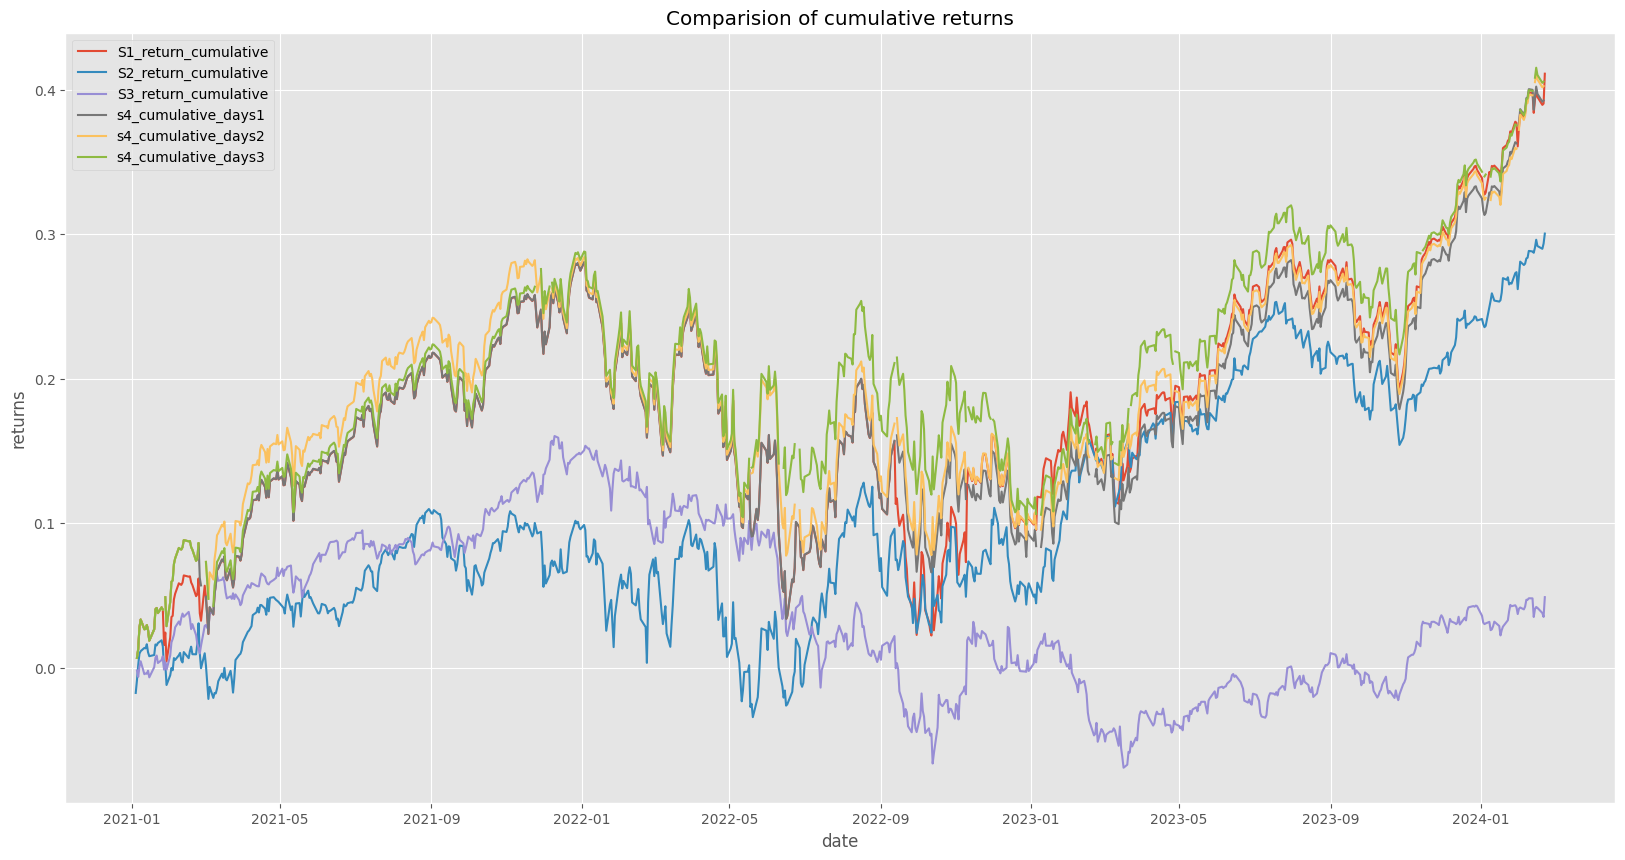

In [9]:
# plot of cumulative returns

columns_to_plot = ["S1_return_cumulative","S2_return_cumulative","S3_return_cumulative","s4_cumulative_days1","s4_cumulative_days2","s4_cumulative_days3"]

plt.figure(figsize=(20,10))
plt.style.use('ggplot')
for columns in columns_to_plot:
    plt.plot(data[columns],label = columns)
plt.title('Comparision of cumulative returns')
plt.xlabel('date')
plt.ylabel('returns')
plt.legend()  
plt.show()

# Interpretation of Kernel density plot

Kernel density plot represent the distribution of returns. Risk-averse investors tend to prefer strategies with narrower spreads and higher peaks (such as Strategy 3 and Strategy4_days3) because they suggest lower volatility and more predictable performance. Risk-seeking investors who are willing to accept more uncertainty in exchange for higher returns may prefer strategies with wider spreads (such as Strategy 1).

Overall, Strategy3 and the Strategy4 composite strategy evaluated on day 3 appear to offer a good risk-reward balance, with Strategy3 being the most conservative and Strategy4_days3 having a slightly riskier profile but potentially higher returns.

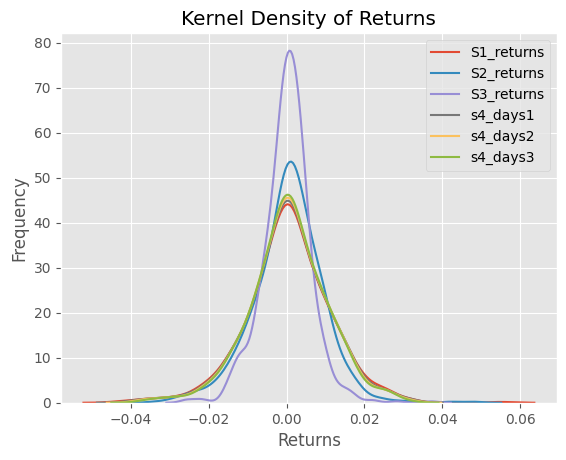

In [10]:
# Kernel density plot of normal returns

columns_to_plot = ["S1_returns","S2_returns","S3_returns","s4_days1","s4_days2","s4_days3"]
plt.figure()

for columns in columns_to_plot:
    sns.kdeplot(data[columns], label= columns)
plt.title('Kernel Density of Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# risk return tradeoff

Six strategies (Strategy1, Strategy2, Strategy3, Strategy4_days1, Strategy4_days2, and Strategy4_days3) are displayed in a scatter plot with returns on the x-axis and risk on the y-axis. Higher returns are generally desired, but they frequently entail greater risk. Striking a balance between a reasonable degree of risk and the need for greater returns is the trade-off.

Although it isn't the lowest on the plot, the strategy designated as Strategy4_days3 appears to have the highest return with a moderate amount of risk and is well-balanced in light of its return. Although it isn't at the very top, its placement in the upper right quadrant suggests a higher return without the highest risk, which may be appealing. 

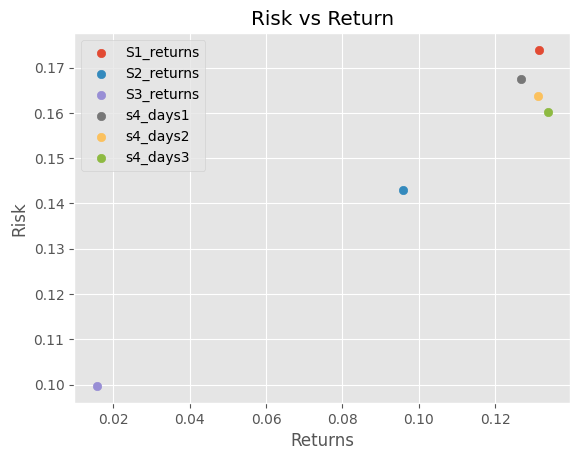

In [11]:
#  Risk vs return tradoff:

plt.figure()
for column in columns_to_plot:
    plt.scatter((descriptive_stats.at[0,column])*252,(descriptive_stats.at[2,column])*np.sqrt(252),label = column)
plt.title('Risk vs Return')
plt.xlabel('Returns')
plt.ylabel('Risk')
plt.legend()
plt.show()

In [12]:
# Value at Risk(VaR) of returns

column = ["S1_returns","S2_returns","S3_returns","s4_days1","s4_days2","s4_days3"]
confidence = [0.90,0.95,0.99]
var = pd.DataFrame(columns=column)
var.insert(0,"confidence" , confidence)
for column in column:
    index = 0 
    for i in confidence: 
        var.at[index,column] = np.percentile(data[column].dropna(),100-(i*100))
        index +=1
        

# Value at risk(VaR)

It represents the maximum loss that can be expected over a given time period and confidence level. Strategy3 consistently has the lowest VaR across all confidence levels, indicating the lowest expected loss in adverse market conditions.

In [13]:
Markdown( 
  tabulate(var, showindex=False, 
           headers=var.columns)
)

  confidence    S1_returns    S2_returns    S3_returns    s4_days1    s4_days2    s4_days3
------------  ------------  ------------  ------------  ----------  ----------  ----------
        0.9     -0.0124803    -0.0107961   -0.00728079  -0.0122967  -0.012041   -0.0118235
        0.95    -0.0173206    -0.0150449   -0.011212    -0.0167694  -0.0164641  -0.0158844
        0.99    -0.029809     -0.0245742   -0.0151905   -0.0290971  -0.0289709  -0.0282887

In [14]:
# Conditional Value at Risk(CVaR) of returns

confidence = [0.90,0.95,0.99]
column = ["S1_returns","S2_returns","S3_returns","s4_days1","s4_days2","s4_days3"]
cvar =  pd.DataFrame(columns=column)
cvar.insert(0,"confidence" , confidence)
simplereturns= pd.DataFrame()
for column in column:
    simplereturns[column] = data[column]
    index = 0
    for i in confidence:
        cvar.at[index,column] = np.mean(simplereturns[simplereturns[column]< var.at[index,column]])
        index +=1 


# conditional value at risk(CVaR)

The Conditional Value at Risk (CVaR) is an average of losses that exceed the VaR threshold. Strategy3, like VaR, has the lowest CVaR, indicating that in worst-case scenarios (beyond the VaR threshold), Strategy3's losses will be less severe than those of the other strategies.

In [15]:
Markdown( 
  tabulate(cvar, showindex=False, 
           headers=cvar.columns)
)

  confidence    S1_returns    S2_returns    S3_returns    s4_days1    s4_days2    s4_days3
------------  ------------  ------------  ------------  ----------  ----------  ----------
        0.9     -0.0198611    -0.0166415   -0.00747038  -0.0144656  -0.0149406  -0.0151797
        0.95    -0.0249339    -0.020238    -0.00853433  -0.0181663  -0.0186956  -0.0188489
        0.99    -0.0366529    -0.0291582   -0.0102922   -0.0262315  -0.0268309  -0.0269983

# Real-world Limitations

Market Conditions:
The performance metrics are historical, so they may not accurately predict future returns. Market conditions change, and successful strategies may no longer be effective in the future.

Liquidity Risk: 
Certain strategies may experience liquidity issues, limiting their ability to execute trades at desired prices for intraday strategies.

# Real-world Limitations

Transaction Costs: It can have a significant impact on net returns, particularly for frequent trading strategies.

Model Risk: The assumptions used to calculate VaR and CVaR may not be accurate in all market conditions, resulting in under or overestimation of risk measures.

# Best Overall Strategy

Given the trade-off between returns and risk, Strategy4_days3 appears to be the best overall strategy. It has higher mean returns (compared to the highest), the best Sharpe ratio (indicating superior risk-adjusted returns), and reasonable risk metrics (VaR and CVaR) than the others. However, the choice of the "best" strategy is also determined by the investor's risk tolerance, investment horizon, and specific objectives.

The reason Strategy4_days3 is beneficial is that it provides a greater return at a moderate risk. Although it is not the strategy with the lowest risk in absolute terms, it successfully manages risk and return.



# Conclusion

In conclusion, while Strategy4_days3 produces promising results based on the analysis, investors should consider real-world constraints and their personal investment profile before implementing any strategy. Continuous monitoring and adjustment in response to changing market conditions are also required to ensure the effectiveness of any investment strategy.